# Gaussian Process - Boom 1

There it is.

n = 1000


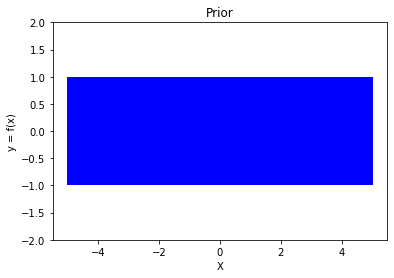

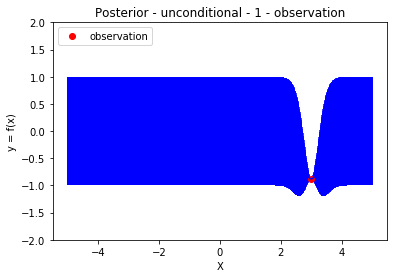

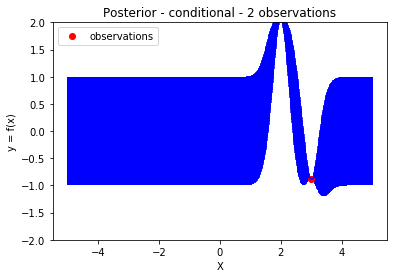

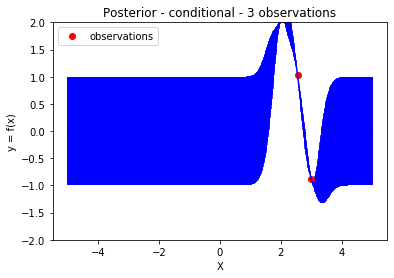

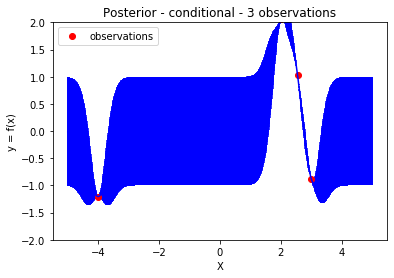

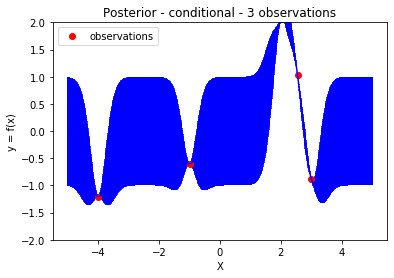

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Test data
n = 1000
print('n =', n)
test_X = np.linspace(-5, 5, n)
# Kernel function
def kernel(a, b):
    return np.exp(-.5 * 1/.1 * (np.subtract.outer(a, b)**2))
# Prior distribution
sigma_prior = kernel(0, 0)
plt.title('Prior')
plt.errorbar(test_X, np.zeros(n), yerr=sigma_prior, color='b')
plt.xlabel('X')
plt.ylabel('y = f(x)')
plt.ylim(-2*sigma_prior, 2*sigma_prior)
plt.show()
# Posterior - sample from unconditional Gaussian since there are no previous data points
x = [3.]
y = [np.random.normal(scale=sigma_prior)]
K = kernel(x, x)
def predict(x, data, K, t):
    Kx = [kernel(x, x_) for x_ in data]
    Kinv = np.linalg.inv(K + 1e-15*np.eye(len(K)))
    y_pred = np.dot(Kx, Kinv).dot(t)
    sigma_new = kernel(x, x) - np.dot(Kx, Kinv).dot(Kx)
    return y_pred, sigma_new
train_X = test_X
predictions = [predict(i, x, K, y) for i in test_X]
y_pred, sigmas = np.transpose(predictions)
plt.title('Posterior - unconditional - 1 - observation')
plt.errorbar(train_X, y_pred, yerr=sigmas, color='b')
plt.plot(x, y, 'ro', label='observation')
plt.xlabel('X')
plt.ylabel('y = f(x)')
plt.ylim(-2*sigma_prior, 2*sigma_prior)
plt.legend(loc='upper left')
plt.show()
# Posterior - condition on the first point
x1 = 2.
def condition(x_new, x, y):
    A = kernel(x, x)
    B = kernel(x, x_new)
    C = kernel(x_new, x_new)
    mu = np.dot(B.T, np.linalg.inv(A)).dot(y)
    sigma = C - np.dot(B.T, np.linalg.inv(A)).dot(B)
    return (mu.squeeze(), sigma.squeeze())
m, s = condition([x1], x, y)
y1 = np.random.normal(m, s)
x.append(x1)
y.append(y1)
K = kernel(x, x)
predictions1 = [predict(i, x, K, y) for i in test_X]
y_pred, sigmas = np.transpose(predictions1)
plt.title('Posterior - conditional - 2 observations')
plt.errorbar(train_X, y_pred, yerr=sigmas, color='b')
plt.plot(x, y, 'ro', label='observations')
plt.xlabel('X')
plt.ylabel('y = f(x)')
plt.ylim(-2*sigma_prior, 2*sigma_prior)
plt.legend(loc='upper left')
plt.show()
# Posterior - condition on first two points (sandwich new point in between old ones)
x2 = 2.55
m, s = condition([x2], x, y)
y2 = np.random.normal(m, s)
x.append(x2)
y.append(y2)
K = kernel(x, x)
predictions1 = [predict(i, x, K, y) for i in test_X]
y_pred, sigmas = np.transpose(predictions1)
plt.title('Posterior - conditional - 3 observations')
plt.errorbar(train_X, y_pred, yerr=sigmas, color='b')
plt.plot(x, y, 'ro', label='observations')
plt.xlabel('X')
plt.ylabel('y = f(x)')
plt.ylim(-2*sigma_prior, 2*sigma_prior)
plt.legend(loc='upper left')
plt.show()
# Posterior - condition on first three points (an outlier to the left)
x3 = -4.
m, s = condition([x3], x, y)
y3 = np.random.normal(m, s)
x.append(x3)
y.append(y3)
K = kernel(x, x)
predictions1 = [predict(i, x, K, y) for i in test_X]
y_pred, sigmas = np.transpose(predictions1)
plt.title('Posterior - conditional - 3 observations')
plt.errorbar(train_X, y_pred, yerr=sigmas, color='b')
plt.plot(x, y, 'ro', label='observations')
plt.xlabel('X')
plt.ylabel('y = f(x)')
plt.ylim(-2*sigma_prior, 2*sigma_prior)
plt.legend(loc='upper left')
plt.show()
# Posterior - condition on first four points
x4 = -1.
m, s = condition([x4], x, y)
y4 = np.random.normal(m, s)
x.append(x4)
y.append(y4)
K = kernel(x, x)
predictions1 = [predict(i, x, K, y) for i in test_X]
y_pred, sigmas = np.transpose(predictions1)
plt.title('Posterior - conditional - 3 observations')
plt.errorbar(train_X, y_pred, yerr=sigmas, color='b')
plt.plot(x, y, 'ro', label='observations')
plt.xlabel('X')
plt.ylabel('y = f(x)')
plt.ylim(-2*sigma_prior, 2*sigma_prior)
plt.legend(loc='upper left')
plt.show()